#  Project 2: Harris Corner Detection and Matching

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from utils import plotFigureGray, plotFigure
from student_code import harris_corners, get_keypoints, get_features

## Open Two images for matching. Convert them into grayscale
### Take two similar images and add the photos to folder data. Rename these images as img1.jpg, and img2.jpg

In [56]:
img1_orig = cv2.imread('../data/notre1.jpg')
img2_orig = cv2.imread('../data/notre2.jpg')


img1= np.float32(cv2.cvtColor(img1_orig,cv2.COLOR_BGR2GRAY))
img2= np.float32(cv2.cvtColor(img2_orig,cv2.COLOR_BGR2GRAY))

# Get Harris Corners, normalize the corner values between 0 and 255. 

In [57]:
corners1, Ix1, Iy1 = harris_corners(img1, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)
corners2, Ix2, Iy2 = harris_corners(img2, window_size=3, alpha=0.04, threshold=1e-3, nms_size=5)

corners1 = cv2.normalize(corners1, corners1, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
corners2 = cv2.normalize(corners2, corners2, alpha=0, beta=255,
                       norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Set the threshold for corners and generate key points from these corners

In [58]:
threshold = 40
kp1 = get_keypoints(corners1, Ix1, Iy1, threshold)
kp2 = get_keypoints(corners2, Ix2, Iy2, threshold)

# Draw the key points. The line (radius) depicts the gradient

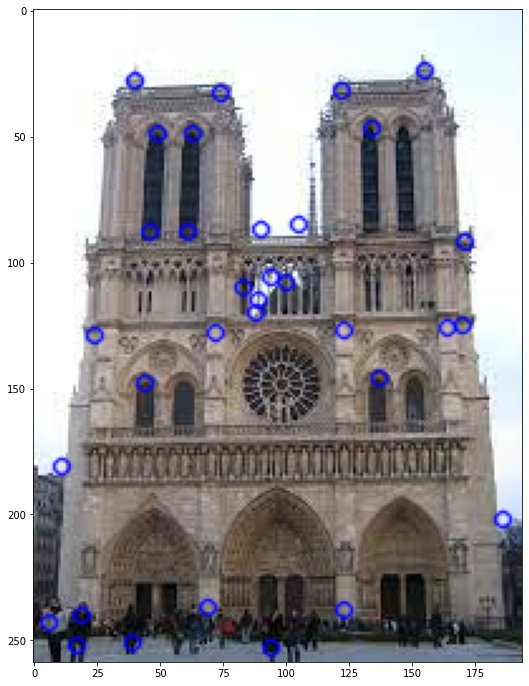

In [59]:
cv2.drawKeypoints(img1_orig, kp1, img1_orig, color=(255,0,0))
                         
plotFigure(img1_orig,12)
plt.show()   

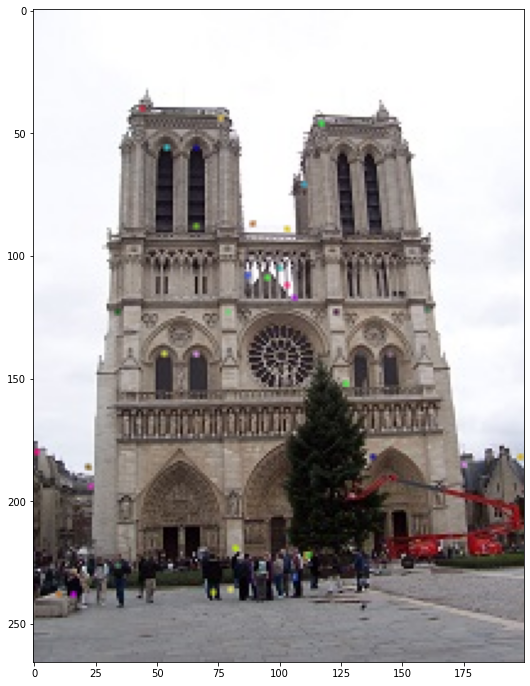

In [60]:
cv2.drawKeypoints(img2_orig, kp2, img2_orig,
                          flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plotFigure(img2_orig,12)
plt.show()   

# From these key points, generate ORB descriptors. Then match these descriptors



In [61]:
orb = cv2.ORB_create()

# create sift instance
# sift = cv2.xfeatures2d.SIFT_create()
# get descriptors
descriptors1 = orb.compute(img1_orig, kp1)[1]
descriptors2 = orb.compute(img2_orig, kp2)[1]


In [62]:
print(descriptors1)

[[131  72  43 136  86 197 169  68 196  72  80 130  48 158  54 100 108  57
   19 141 163 156  52 221   5   0 154 202  29   8  49 252]
 [ 55  90 226 154 238 181 248 212 159  91 213 215  56 206 247 104 111 171
   23 159 135 179  62 241  22  26 186 200 191 221 249 213]
 [131 197  28 175  52   6 175 173  12   8  82  66 244  24  56  97 216   1
   27 237  98 188  65 253 164  57 170 128  20  26 153  41]
 [ 11 193   0 175  53   4 174 173  12   8  90  64 244  24  56 228 216   3
   19 237  66 184  65 253  37  61 170 128  20  26 153 168]
 [147 200  39 188  46 133 140 231 220  18 146  82  60 152  52 227 238 163
   63 133 227  47   6 245 176  42 254 216  28  24 177   8]
 [ 76   0  20  35   1  74 146 136  12  32   3   1 196  81   9 203 144  69
  137  99   0  48  73   8   5  48  75  23  80  55  29   2]
 [124 117 168 225 212 111  87 222  51 226 236   8  23  63  81  16  89 222
   85 185  57 242 217  10 255 205 165 125 160 248 214 250]
 [  7 141  33 139 213 215 174   3  93  65  75  71 200  56  52 228 216

In [63]:

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)



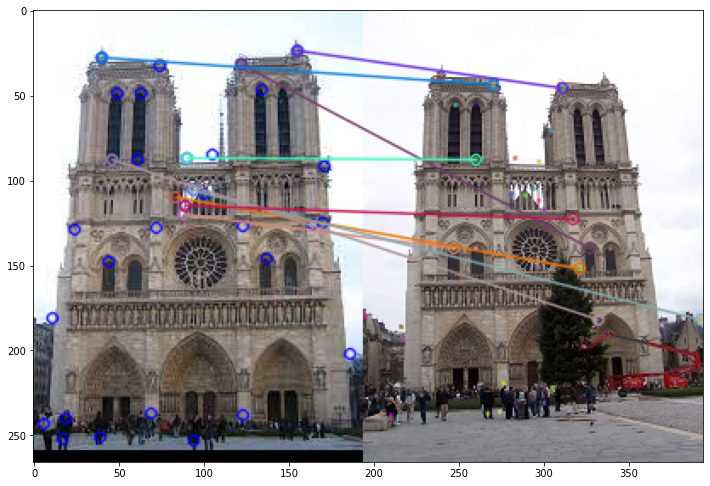

True

In [64]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched.png', img3)


## Custom SIFT descriptor

In [65]:
import math

In [66]:
descriptors1 = get_features(img1, kp1, 16)
descriptors2 = get_features(img2, kp2, 16)

In [67]:
descriptors1 = np.float32(descriptors1)
descriptors2 = np.float32(descriptors2)

# get matches
bfm = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bfm.match(descriptors1, descriptors2)
matches = sorted(matches, key = lambda x:x.distance)

img3 = np.array([])

img3 = cv2.drawMatches(img1_orig,kp1,img2_orig,kp2,matches[:10], img3, flags=2)





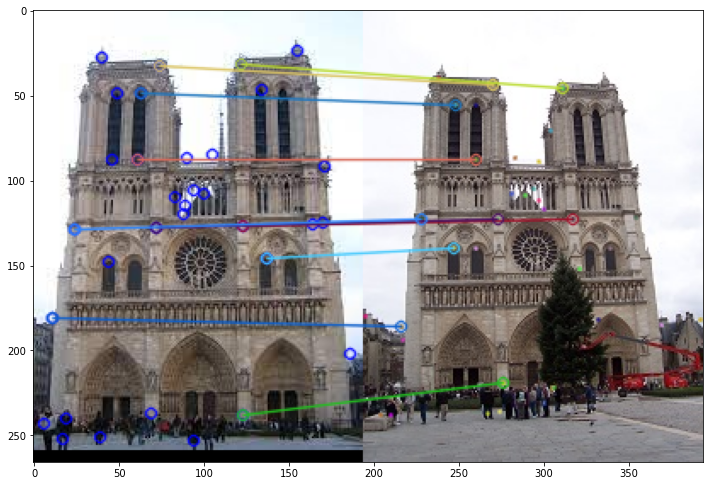

True

In [68]:
plotFigure(img3,12)
plt.show() 
cv2.imwrite('../results/matched_SIFT.png', img3)
